<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit6/YangChau_Unit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"
!pip install bambi


#Introduction

This project aims to predict the cost of health insurance with a linear regression model using three - four predictors. These predicting variables consist of an individual's BMI, the number of children they have, their age, and the region of the USA they live in. To some it may feel a bit insensitive to be doing a project on this topic in light of recent events, but that event is really what sparked my interest in the widespread disatisfaction with America's health care system.

##Data Used
The data used was sourced from kaggle and contains information about an individual's gender, BMI, age, amount of kids, whether or not they smoke, the region they live in, and the amount of money they pay in health insurance fees.
- For the sake of simplicity I will be ommitting some of these variables so as to preserve the readability of the linear regression models.
- An excess of predicting variables can also result in overfitting


In [3]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import arviz as az
import seaborn as sns
import pymc as pm
from scipy.interpolate import PchipInterpolator
import bambi as bmb

##Explanation of Varibles Chosen

###BMI
A person with a high BMI is likely to be overweight, or obese, which correlates with higher health insurance costs as companies understand that their client is at a greater risk of requiring their services

###Age
Older people tend to be more fragile and at greater risk of needing health insurance services, thus, they are also more likely to have to pay more.
- Age may also be an indicator of other factors
  - The older someone is the more likely they will have had children
  - The older someone is the more their metabolism will change and slow down, resulting in generally higher BMI values

###Number of Children
The number of children included in a healthcare plan will raise the cost of that healthcare plan simply by virtue of adding more people to the protection of the plan
- Can also indicate other variables
  - As mentioned earlier, the number of children someone has may correlate to a specific change in BMI as a person undergoes the rigors of pregnancy

###Region
Certain regions of the United States may be treated differently by health insurance companies for a variety of reasons
- This variable is only used for the hierarchical model

In [4]:
url = "https://raw.githubusercontent.com/aahFancyGun/dataScienceClass/master/unit6/insurance.csv"

insurance_data = pd.read_csv(url) #reading data

insurance_data #printing data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


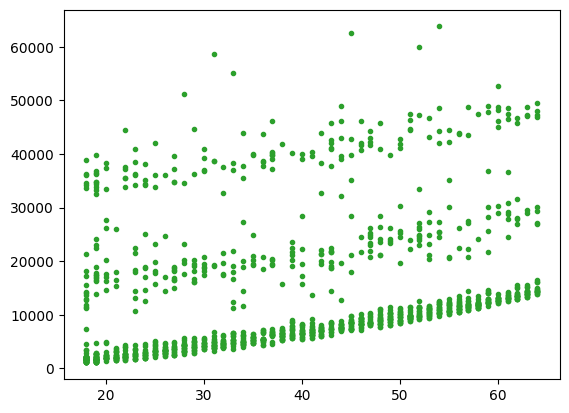

In [32]:
plt.plot(insurance_data.age, insurance_data.charges, "C2.")

## Initial Data Analysis

At a first glance its clear that theres some sort of separating variable that's splitting the data into 3 distinct lines. I honestly have no idea why this is happening but I do have a few theories.

- I think it's possible that these represent separations between regions.
  - although there are more than three regions, it's possible that regions that are adjacent to each other share qualities with each other, leading to an overlap in data point distribution

- There are certain datapoints in the set that I'm not taking account of right now like smoking because it's a true/false variable which I'm not sure how to handle in a model.
  - Despite that, I'm pretty confident that smokers will in general have to pay more for insurance give that smoking is a known unhealthy habit. This only accounts for two lines though

- BMI could also account for the lines.
  - Specific thresholds of BMI correlate with different conditions (obese, overweight, etc). It's possible that insurance companies may price their plans based on this threshold, resulting in three distinct lines.

#Models
I will be "mixing and matching" different methods of using my three main variables and one hierarchical variable (bmi, children, region, and age) to create different variations of models and comparing them at the end.

Model Combinations:

1. Children, Age, and BMI with no interactions
2. Children, Age, and BMI with an interaction between Age and Children
3. Children, Age, and BMI with an interaction between Age and BMI
4. Children, Age, and BMI with an interaciton between BMI and Children
5. Interactions between all 3 variables
6. Interactions between all 3 variables at the same time
7. Hierarchical model which adds in region as a categorizing factor

In [5]:
model_1 = bmb.Model("`charges` ~ `bmi` + `children` + `age`", data=insurance_data)

idata_1 = model_1.fit(idata_kwargs={'log_likelihood': True})



Output()

Output()

In [6]:
model_2 = bmb.Model("`charges` ~ `bmi` + `children` + `age` + 'age':'children'", data=insurance_data)

idata_2 = model_2.fit(idata_kwargs={'log_likelihood': True})


Output()

Output()

In [7]:
model_3 = bmb.Model("`charges` ~ `bmi` + `children` + `age` + 'age':'bmi'", data=insurance_data)

idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})


Output()

Output()

In [8]:
model_4 = bmb.Model("`charges` ~ `bmi` + `children` + `age` + 'bmi':'children'", data=insurance_data)

idata_4 = model_4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [9]:
model_5 = bmb.Model("`charges` ~ `bmi` + `children` + `age` + 'age':'children' + 'age' : 'bmi' + 'bmi':'children'", data=insurance_data)

idata_5 = model_5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [10]:
model_6 = bmb.Model("`charges` ~ `bmi` + `children` + `age` + 'age': 'children' : 'bmi'", data=insurance_data)

idata_6 = model_6.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [11]:
model_h = bmb.Model(
    "'charges' ~ 'age' + 'bmi' + 'children' + (1 | 'region')",
    data=insurance_data
)
idata_h = model_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

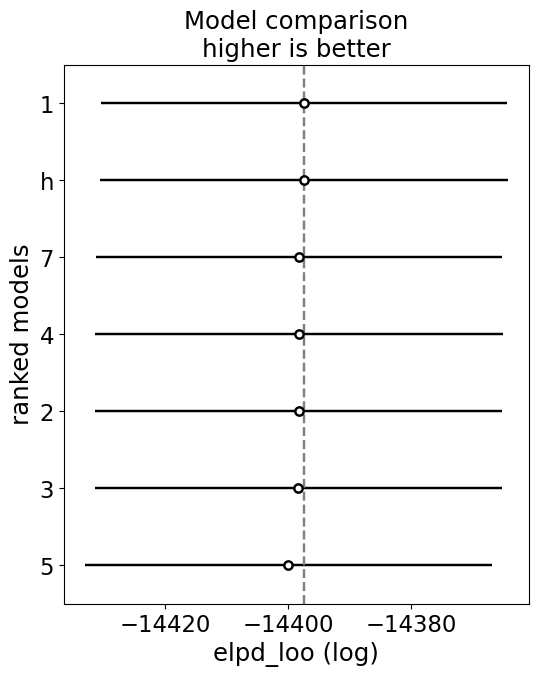

In [12]:
cmp = az.compare({"1":idata_1,"2":idata_2, "3":idata_3, "4":idata_4, "5":idata_5, "h":idata_h, "6":idata_6})
az.plot_compare(cmp)

## Analysis

Well that's awkward, seems like all the models are essentially the same with the non associative model and the hierarchical model slightly edging the others out.

### Potential Causes

Although I drew connections between variables, its possible that the association between the variables isn't as strong as initially thought

The dataset might not take into account specific factors not included
 - education level
 - poverty
 - etc

It's possible that only one variable is really important and can produce equal if not better effects that its counterparts that use association among other techniques discussed.

###Investigating

In order to investigate the potential causes, I'm going to construct models using only one variable and comparing them against the original models in order to ascertain whether one specific variable is important above all others.

In [18]:
model_age = bmb.Model("`charges` ~ `age`", data=insurance_data)

idata_age = model_age.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [19]:
model_bmi = bmb.Model("`charges` ~ `bmi`", data=insurance_data)

idata_bmi = model_bmi.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [20]:
model_children = bmb.Model("`charges` ~ `children`", data=insurance_data)

idata_children = model_age.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

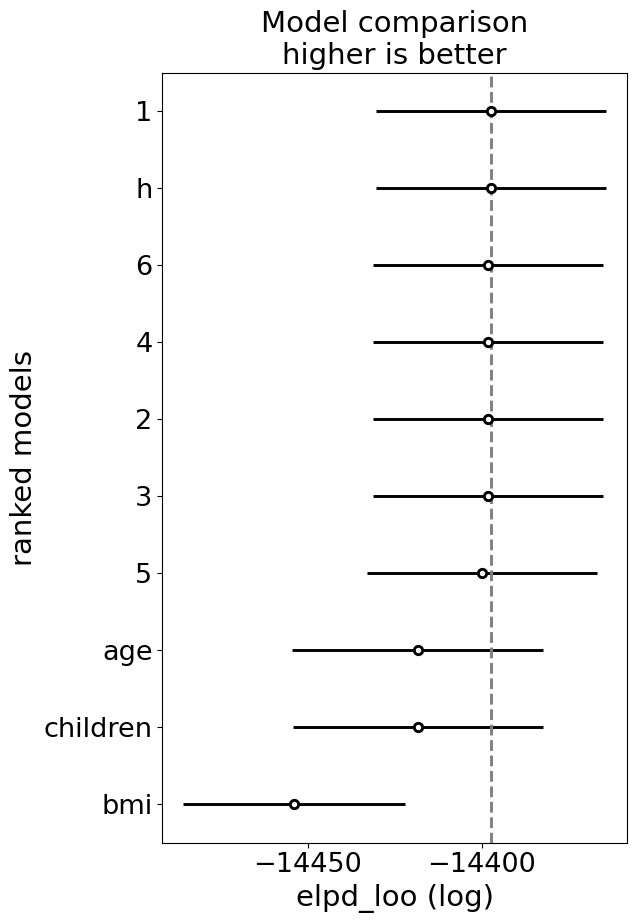

In [21]:
cmp = az.compare({"1":idata_1,"2":idata_2, "3":idata_3, "4":idata_4, "5":idata_5, "h":idata_h, "6":idata_6, "age":idata_age, "bmi":idata_bmi, "children":idata_children})
az.plot_compare(cmp)

### Individual variable model analysis

Well it's pretty plain to see that on their own these variables can't match what they can do when working together but analyzed in a vaccum they're still very interesting.

Just based off elpd_loo, we see that age and children are equally important to predicting charges but BMI is significantly lagging behind the other two variables. So already, just from looking at the order of importance of variables we have a better understanding of how insurance companies might calculate their charges.

- This is honestly pretty interesting and makes me wonder why BMI performs as badly as it does
  - I think it's possible that with the fact acceptance activism there might be an uptake in company policy to ignore a person's bmi when calculating the cost of a health insurance plan despite the fact that someone with a high BMI is likely to require the services of insurance a lot more than someone with a lower BMI.

#### No Association between variables (BMI, AGE, # OF CHILDREN)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


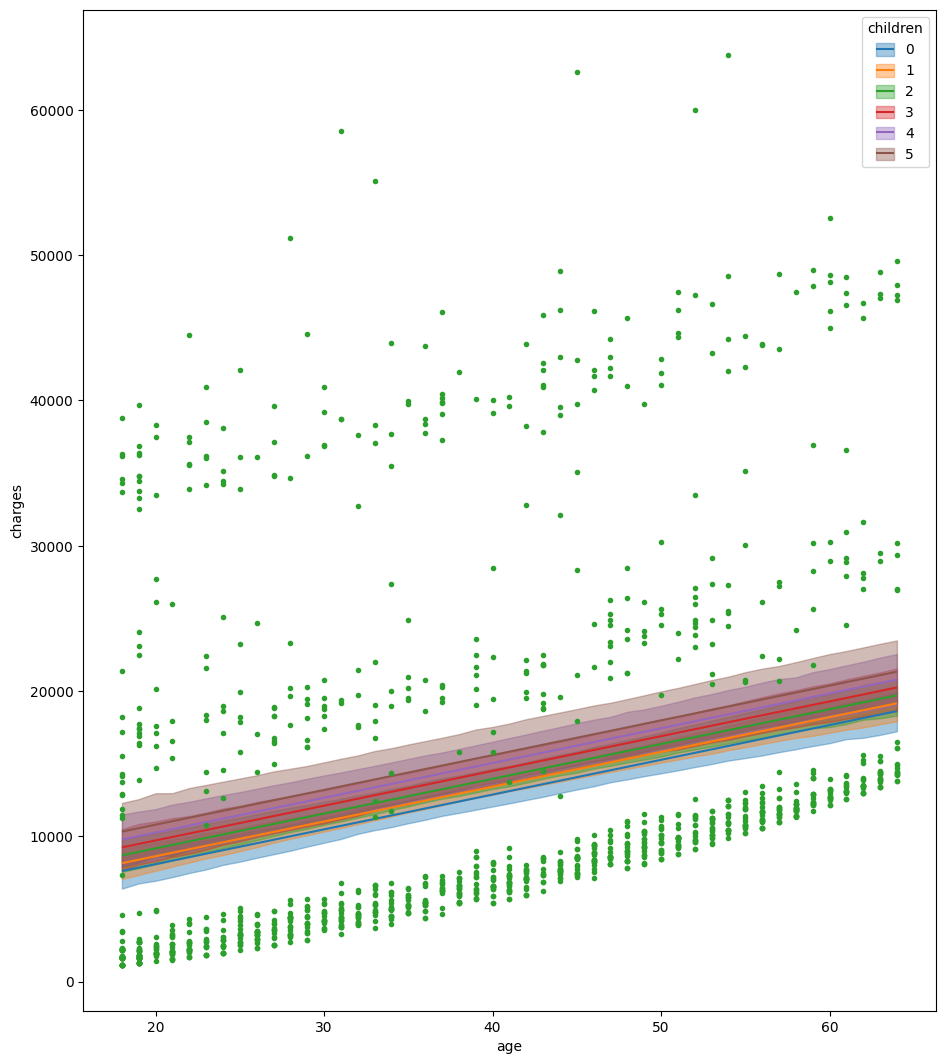

In [38]:
bmb.interpret.plot_predictions(model_1,
                               idata_1,
                               ["age","children"],
                               fig_kwargs={"figsize":(11, 13)})

plt.plot(insurance_data.age, insurance_data.charges, "C2.")

#Conclusions
Comparing all models, it's pretty clear that with the exception of model_5, they all performed essentially as well as each other. In fact, over multiple reruns, the top 6 spots would routinely fluctuate and in particular first place would often switch between hierarchical and model_1. When I wrote out my causal diagram, I made a strong connection between age and the number of children someone had and yet despite that, model_2 (interaction between age and # of children) ended up being on the lower end of my results.

Despite the fact that models with associations in general perform the exact same as each other, it's important to note that the associations still dramatically boosted the overall performance of the model. As can be seen by the elpd_loo graph, on their own, these variables can't predict as well as when used in tandem.

I also never figured out why there were three distinct lines in the data, despite graphing each variable independently.

##Why?
Well its probably a number of things but the most likely answer is simply that a lot of these interactions between variables are very subjective to different people. For example, the association I made with BMI and children only applied to half the dataset (women). Furthermore, people age differently, and their metabolisms might not slow at the same rate, not to mention the outliers who sink into obesity or maintain a fit body into their later years. Even for my strongest connection (between age and # of children), it can be argued that with the US's declining birth rate, age is no longer a good indicator of the amount of children someone has.

Hierarchical's performance was also most impressive to me, despite the fact that I assigned it a weak connection to my 3 main variables. My thought process was that with all the sectionalism in the USA it's possible that people simply from different regions have different lifestyles which culiminate in different BMI, average age, and number of children. The reason I assigned it a weaker connection was because I thought that with all the immigration that takes place in the US, that human movement would end up distorting a bit.

##Useful?
There's undoubtedly a connection between the three main variables and insurance cost in the USA, with many articles showing that personal attributes like BMI, age, and number of children are a direct affector of insurance costs. For that reason, I believe that despite the fact that the model's elpd_loo is honestly horrendous, it's still somewhat a usable model that could be employed in the real world.